# Taller evaluable sobre la extracción, transformación y visualización de datos usando IPython

**Juan David Velásquez Henao**   
jdvelasq@unal.edu.co  
Universidad Nacional de Colombia, Sede Medellín  
Facultad de Minas  
Medellín, Colombia 

# Instrucciones

En la carpeta 'Taller' del repositorio 'ETVL-IPython' se encuentran los archivos 'Precio_Bolsa_Nacional_($kwh)_'*'.xls' en formato de Microsoft Excel, los cuales contienen los precios históricos horarios de la electricidad para el mercado eléctrico Colombiano entre los años 1995 y 2017 en COL-PESOS/kWh. A partir de la información suministrada resuelva los siguientes puntos usando el lenguaje de programación Python. 

# Preguntas

**1.--** Lea los archivos y cree una tabla única concatenando la información para cada uno de los años. Imprima el encabezamiento de la tabla usando `head()`. 

In [1]:
import pandas as pd
x=[]
for n in range(1995,2018):
  if n < 2000:
    skip=3
  else:
    skip=2
    
  nombrearchivo='Precio_Bolsa_Nacional_($kwh)_' + str(n)
  if n>= 2016:
        nombrearchivo += '.xls'
  else:
        nombrearchivo += '.xlsx'
  y=pd.read_excel(nombrearchivo,skiprows=skip, parse_cols=24)
  x.append(y)
todo=pd.concat(x)
todo.head()

,Fecha,0,1,2,3,4,5,6,7,8,...,14,15,16,17,18,19,20,21,22,23
0,1995-07-20,NaN,1.073,1.073,1.073,1.073,1.073,1.073,1.073,1.074,...,1.073,1.073,1.073,1.073,1.074,1.897,1.897,1.897,1.073,1.073
1,1995-07-21,1.073,1.000,1.000,1.000,1.000,1.000,5.000,6.000,6.000,...,5.000,1.000,1.000,5.000,12.000,16.670,11.929,5.000,1.000,1.000
2,1995-07-22,1.073,1.073,1.000,1.000,1.000,1.073,1.303,1.303,1.303,...,1.073,1.000,1.000,1.000,1.303,2.500,2.500,1.303,1.073,1.073
3,1995-07-23,1.073,1.000,1.000,1.000,1.000,1.000,0.100,1.000,1.000,...,1.000,0.100,0.100,1.000,1.238,1.238,1.238,1.238,1.073,1.000
4,1995-07-24,1.000,1.000,0.990,1.000,1.000,1.073,3.000,3.000,3.000,...,1.073,1.073,3.000,2.000,18.630,22.500,9.256,3.000,1.073,1.000


In [98]:
#todo.to_excel('Todo.xlsx', sheet_name='Sheet1')

**2.--** Compute e imprima el número de registros con datos faltantes.

In [2]:
nan_rows = todo[todo.isnull().T.any().T]
len(nan_rows)

28

In [3]:
#nan_rows

**3.--** Compute e imprima el número de registros duplicados.

In [4]:
len(todo)-len(todo.drop_duplicates(subset=['Fecha'])) #si no se pone el subset omite unos duplicados.

82

**4.--** Elimine los registros con datos duplicados o datos faltantes, e imprima la cantidad de registros que quedan (registros completos).

In [5]:
sinduplicados=todo.drop_duplicates(subset=['Fecha'])
sinfaltantes=sinduplicados.dropna()
len(sinfaltantes)

7875

**5.--** Compute y grafique el precio primedio diario.

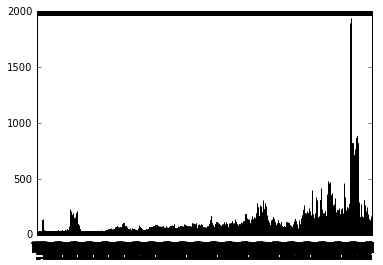

In [7]:
media=sinfaltantes.mean(axis=1)
import matplotlib
%matplotlib inline
media.plot(kind='bar')

**6.--** Compute y grafique el precio máximo por mes.

In [30]:
#todo.iloc[7,0] # iloc busca el renglon especifico , con una columna especifica
w=[]
for n in range(len(sinfaltantes)):
    w.append(str(sinfaltantes.iloc[n,0])[0:7])
sinfaltantes['key']=w

sinfaltantes['max']=sinfaltantes.max(axis=1)
a=sinfaltantes.groupby('key').max()['max']

C:\Users\egome\Anaconda3\lib\site-packages\ipykernel\__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\egome\Anaconda3\lib\site-packages\ipykernel\__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


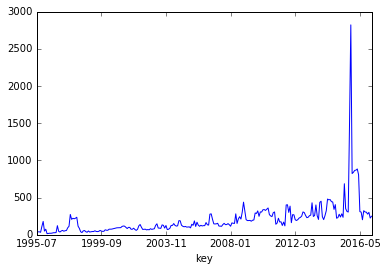

In [31]:
%matplotlib inline
a.plot(kind='line')

**7.--** Compute y grafique el precio mínimo mensual.

C:\Users\egome\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


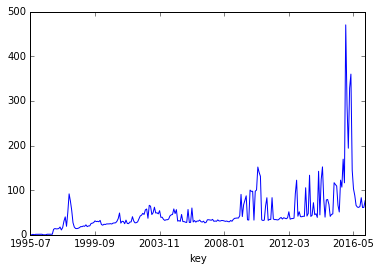

In [32]:
sinfaltantes['min']=sinfaltantes.min(axis=1)
b=sinfaltantes.groupby('key').min()['min']
%matplotlib inline
b.plot(kind='line')

**8.--** Haga un gráfico para comparar el precio máximo del mes (para cada mes) y el precio promedio mensual.

In [33]:
#para calcular el promedio mensual
sinduplicados=todo.drop_duplicates(subset=['Fecha'])
sinfaltantes=sinduplicados.dropna()
sinfaltantes['media']=sinfaltantes.mean(axis=1)

w=[]
for n in range(len(sinfaltantes)):
    w.append(str(sinfaltantes.iloc[n,0])[0:7])
sinfaltantes['key']=w

c=sinfaltantes.groupby('key').mean()['media']

#maximosmes = sinfaltantes[['key','Fecha', 'max']] #para extraer las columnas que quiera
#maximosmes.head()

C:\Users\egome\Anaconda3\lib\site-packages\ipykernel\__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\egome\Anaconda3\lib\site-packages\ipykernel\__main__.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


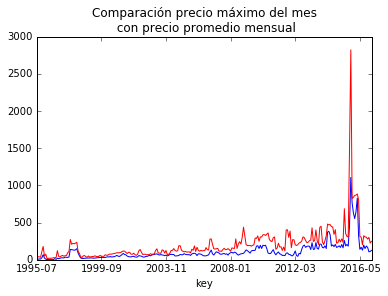

In [34]:
import matplotlib.pyplot as plt
plt.title('Comparación precio máximo del mes\n con precio promedio mensual')
c.plot(kind='line',color='blue')
plt.hold(True)
a.plot(kind='line',color='red')


**9.--** Haga un histograma que muestre a que horas se produce el máximo precio diario para los días laborales.

In [68]:
#eliminar duplicados y archivos cuya fecha sea nula
sinfechanula=todo.dropna(subset=['Fecha'])
sinduplicados=sinfechanula.drop_duplicates(subset=['Fecha'])

#crear la columna tipodias
dias=['L','L','S','D','L','L','L']*int(len(sinduplicados)/7)+['L','L','S','D']
sinduplicados['tipodia']=dias

#Dejar solo los días laborales
sinfecha=sinduplicados.drop('Fecha',1)
sinsabados=sinfecha[sinfecha.tipodia != 'S']
sololaborales=sinsabados[sinsabados.tipodia !='D']

#Eliminar los registros nulos 
sololaborales=sololaborales.dropna()

#Resetiar los indices y quitar la columnas tipodia para tener solo valores numéricos
x=sololaborales.drop('tipodia',1)
x = x.reset_index()
del x['index']

#Obtener la posicón en que ocurre el maximo en cada día
conteo=[]
for i in range(len(x)):
    enumerate(x.ix[i])
    for j, e, in enumerate(x.ix[i]):
        if e ==(x.ix[i].max()):
            conteo.append(j)        

C:\Users\egome\Anaconda3\lib\site-packages\ipykernel\__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


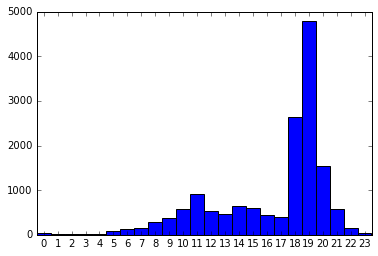

In [69]:
#gráfico

#Realizar el conteo de posiciones
conteo.sort()
c=[]
for x in range(0,24):
    c.append(conteo.count(x))

#Generar valores para el eje x
ejex=[]
for x in range(0,24):
    ejex.append(x)

#Gráfico
import numpy as np
import matplotlib.pyplot as plt

frequencies = c
pos = np.arange(len(ejex))
width = 1.0     # gives histogram aspect to the bar diagram

ax = plt.axes()
ax.set_xticks(pos + (width / 2))
ax.set_xticklabels(ejex)

plt.bar(pos, frequencies, width, color='b')
plt.show()

**10.--** Haga un histograma que muestre a que horas se produce el máximo precio diario para los días sabado.

In [74]:
sindomingos=sinfecha[sinfecha.tipodia != 'D']
solosabados=sindomingos[sindomingos.tipodia !='L']
solosabados.head()

#Eliminar los registros nulos 
solosabados=solosabados.dropna()

x=solosabados.drop('tipodia',1)
x = x.reset_index()
del x['index']

#Obtener la posicón en que ocurre el maximo en cada día
conteo=[]
for i in range(len(x)):
    enumerate(x.ix[i])
    for j, e, in enumerate(x.ix[i]):
        if e ==(x.ix[i].max()):
            conteo.append(j)   


C:\Users\egome\Anaconda3\lib\site-packages\ipykernel\__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


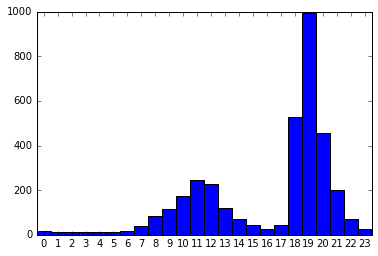

In [71]:
#gráfico

#Realizar el conteo de posiciones
conteo.sort()
c=[]
for x in range(0,24):
    c.append(conteo.count(x))

#Generar valores para el eje x
ejex=[]
for x in range(0,24):
    ejex.append(x)

#Gráfico
import numpy as np
import matplotlib.pyplot as plt

frequencies = c
pos = np.arange(len(ejex))
width = 1.0     # gives histogram aspect to the bar diagram

ax = plt.axes()
ax.set_xticks(pos + (width / 2))
ax.set_xticklabels(ejex)

plt.bar(pos, frequencies, width, color='b')
plt.show()

**11.--** Haga un histograma que muestre a que horas se produce el máximo precio diario para los días domingo.

In [79]:
sinsabados=sinfecha[sinfecha.tipodia != 'S']
solodomingos=sinsabados[sinsabados.tipodia !='L']

#Eliminar los registros nulos 
solodomingos=solodomingos.dropna()

x=solodomingos.drop('tipodia',1)
x = x.reset_index()
del x['index']

#Obtener la posicón en que ocurre el maximo en cada día
conteo=[]
for i in range(len(x)):
    enumerate(x.ix[i])
    for j, e, in enumerate(x.ix[i]):
        if e ==(x.ix[i].max()):
            conteo.append(j)   


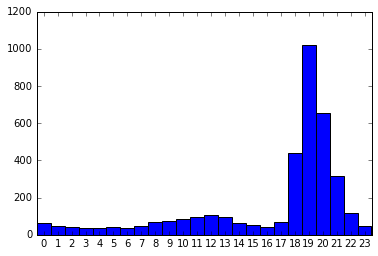

In [80]:
#gráfico

#Realizar el conteo de posiciones
conteo.sort()
c=[]
for x in range(0,24):
    c.append(conteo.count(x))

#Generar valores para el eje x
ejex=[]
for x in range(0,24):
    ejex.append(x)

#Gráfico
import numpy as np
import matplotlib.pyplot as plt

frequencies = c
pos = np.arange(len(ejex))
width = 1.0     # gives histogram aspect to the bar diagram

ax = plt.axes()
ax.set_xticks(pos + (width / 2))
ax.set_xticklabels(ejex)

plt.bar(pos, frequencies, width, color='b')
plt.show()

**12.--** Imprima una tabla con la fecha y el valor más bajo por año del precio de bolsa.

In [112]:
sinduplicados=todo.drop_duplicates(subset=['Fecha'])
sinfaltantes=sinduplicados.dropna()
sinfaltantes['minimo']=sinfaltantes.min(axis=1)

w=[]
for n in range(len(sinfaltantes)):
    w.append(str(sinfaltantes.iloc[n,0])[0:4])
sinfaltantes['key']=w
sinfaltantes.head()
c=sinfaltantes.groupby('key').min()['minimo']
c
 

C:\Users\egome\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
C:\Users\egome\Anaconda3\lib\site-packages\ipykernel\__main__.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


key
1995     0.000000
1996     0.000000
1997    10.882310
1998    13.847330
1999    18.359530
2000    21.531167
2001    24.822879
2002    26.777682
2003    37.013438
2004    32.252998
2005    27.581415
2006    26.714797
2007    30.173824
2008    29.199135
2009    32.892503
2010    32.024957
2011    33.291100
2012    34.988099
2013    40.415346
2014    38.941951
2015    46.791501
2016    61.100689
2017    61.356315
Name: minimo, dtype: float64

**13.--** Haga una gráfica en que se muestre el precio promedio diario y el precio promedio mensual.

In [8]:
sinduplicados=todo.drop_duplicates(subset=['Fecha'])
sinfaltantes=sinduplicados.dropna()
mediadiaria=sinfaltantes.mean(axis=1) #promedio diario

sinfaltantes['media']=sinfaltantes.mean(axis=1)
w=[]
for n in range(len(sinfaltantes)):
    w.append(str(sinfaltantes.iloc[n,0])[0:7])
sinfaltantes['key']=w

c=sinfaltantes.groupby('key').mean()['media'] #promedio mensual



C:\Users\egome\Anaconda3\lib\site-packages\ipykernel\__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\egome\Anaconda3\lib\site-packages\ipykernel\__main__.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


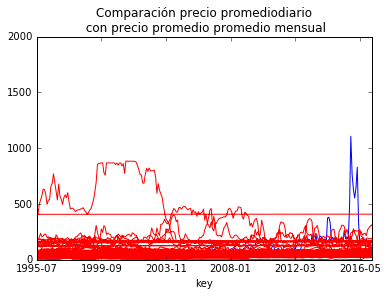

In [9]:
import matplotlib.pyplot as plt
plt.title('Comparación precio promediodiario\n con precio promedio promedio mensual')
c.plot(kind='line',color='blue')
plt.hold(True)
mediadiaria.plot(kind='line',color='red')

---